In [1]:
import pandas as pd
import seaborn as sns

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# Box plot for MEDV - Median value of owner-occupied homes

Text(0.5, 1.0, 'Median Value of Owner-occupied Homes')

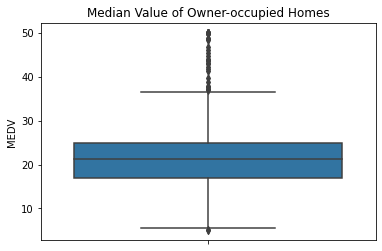

In [32]:
sns.boxplot(data=boston_df, y='MEDV').set_title("Median Value of Owner-occupied Homes")

# Bar plot for the Charles river variable

Text(0.5, 1.0, 'Median Value of Owner-occupied Homes')

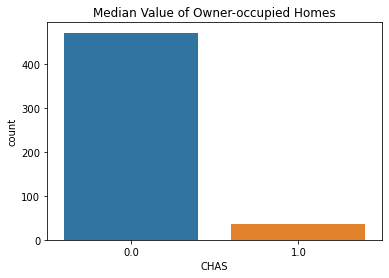

In [5]:
sns.countplot(data=boston_df, x='CHAS').set_title("Median Value of Owner-occupied Homes")

# Box plot for the MEDV variable vs the AGE variable
### Discretize the age variable into three groups of 35 

In [6]:
# Verify the MIN and MAX of AGE variable
boston_df['AGE'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

In [7]:
# Categorize in 3 groups of 35 years
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and youger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70), 'AGE_GROUP'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] > 70), 'AGE_GROUP'] = '70 years and older'

Text(0.5, 1.0, 'Median Value of Owner-occupied Homes by Age Group')

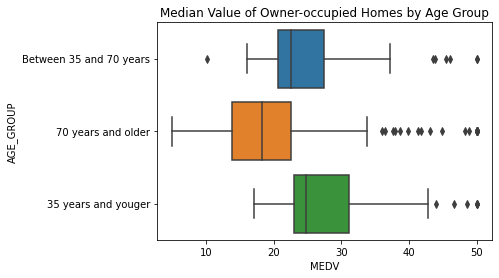

In [8]:
sns.boxplot(data=boston_df, x='MEDV', y='AGE_GROUP').set_title("Median Value of Owner-occupied Homes by Age Group")

# Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

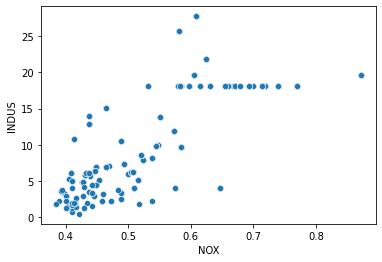

In [9]:
sns.scatterplot(data=boston_df, x="NOX", y="INDUS")

### What can you say about the relationship?

*The graph shows there is a higher concentration of non-retail businesses in lower NOX concentration areas (lower left corner of the chart)*

# Histogram for the pupil to teacher ratio variable


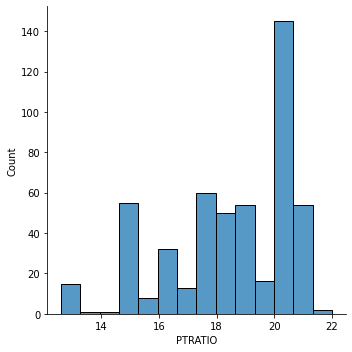

In [10]:
sns.displot(boston_df['PTRATIO'])

# Task 5: Use the appropriate tests to answer the questions provided

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

> H0 - the median value doesn´t differ when bounded by Charles river</p>
> H1 - the median value differs when bounded by Charles river</p>
>> alpha = 0.05

In [11]:
import scipy.stats as st

In [12]:
st.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

*CONCLUSION: with a p-value < alpha we reject the null hypothesis meaning there is a significant difference in house value when sorounded by Charles river*

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

> H0 - the median value of houses is not the same for each proportion of owner-occupied units</p>
> H1 - the median value of houses is the same for each proportion of owner-occupied units</p>
>> alpha = 0.05

In [13]:
boston_df.groupby('AGE').agg({'MEDV':['mean', 'std', 'var']})

MEDV                       
            mean        std         var
AGE                                    
2.9    26.600000        NaN         NaN
6.0    24.100000        NaN         NaN
6.2    23.400000        NaN         NaN
6.5    24.700000        NaN         NaN
6.6    24.750000   0.777817    0.605000
...          ...        ...         ...
98.8   14.500000   2.342363    5.486667
98.9   13.066667   5.519360   30.463333
99.1   10.900000        NaN         NaN
99.3   17.800000        NaN         NaN
100.0  16.920930  10.056875  101.140742

[356 rows x 3 columns]

In [14]:
f_statistic, p_value = st.f_oneway(boston_df['MEDV'], boston_df['AGE'])
f_statistic, p_value

(1223.1740271875933, 3.20946197250671e-176)

*CONCLUSION: with a p-value > alpha we accept the null hypothesis and infer there is a difference among different proportions*

# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

> H0 - there is no correltion between the concentration of NOX and the proportion of non-reatail business acres per town (INDUS)</p>
> H1 - there is a correltion between the concentration of NOX and the proportion of non-reatail business acres per town (INDUS)</p>
>> alpha = 0.05

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

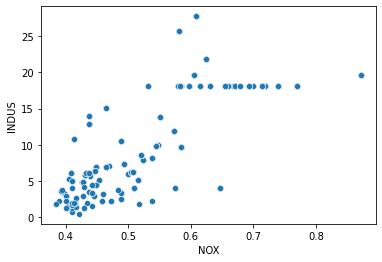

In [15]:
sns.scatterplot(data=boston_df, x="NOX", y="INDUS")

In [16]:
st.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

*CONCLUSION: with a p-value < alpha we reject H0 and infer there is a correlation between NOX and non-retail businesses acres per town*

# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [17]:
import statsmodels.api as sm

In [22]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [24]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           1.21e-08
Time:                        20:28:37   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*CONCLUSION: I am not sure what to conclude in this question*